<div style="text-align: left; font-family: Arial, sans-serif; color: #333;">
<h1 style="font-size: 36px; margin-bottom: 10px; padding: 0;">Dr Math Academy</h1>
<img src="dma.jpeg" alt="Dr Math Academy Logo" style="width: 200px; height: auto; margin: 10px 0; padding: 0;"/>
<p style="font-size: 18px; margin: 10px 0; padding: 0;">Dr Math Academy empowers learners to excel in technology and data science through innovative education.</p>
 <p style="font-size: 16px; margin: 5px 0; padding: 0;">Address: 17, Afuwape Street of Powerline Orile Agege</p> <p style="font-size: 16px; margin: 5px 0; padding: 0;">Email: drmathacademy@gmail.com | Phone: +2347055610501</p>
    <p style="font-size: 16px; margin: 5px 0; padding: 0;">Website: <a href="https://www.drmathacademy.com" target="_blank">www.drmathacademy.com</a></p>
</div>


<div style="text-align: left; font-family: Arial, sans-serif; color: #333;">
<h1 style="font-size: 36px; margin-bottom: 10px; padding: 0;">Uber Project</h1>
<img src="OIP.jfif" alt="uber logo" style="width: 100%; height: 50%; margin: 10px 0; padding: 0;"/>
</div>

# Uber
Uber is a global ride-hailing service founded in 2009, revolutionizing urban transportation by allowing users to book rides via a mobile app. It connects passengers with drivers of vehicles for hire, offering a convenient, on-demand service. Uber operates in hundreds of cities worldwide, providing various services, including UberX (standard rides), UberPOOL (shared rides), and UberBLACK (luxury rides). In addition to ride-hailing, Uber has expanded into food delivery (Uber Eats) and freight logistics (Uber Freight). Known for its user-friendly app and cashless transactions, Uber has transformed how people move within cities.

# Uber Travel Analysis
The Uber Travel Analysis Project aims to explore and understand user travel patterns through Uber's services. Leveraging a comprehensive dashboard, this project analyzes various aspects of Uber trips, including trip categories, peak travel hours, trip purposes, distances covered, and the busiest days and months. The analysis also investigates the most popular starting locations for Uber rides, providing a clear picture of where demand is highest.

By visualizing these data points, the project offers insights into user behavior, such as when people are most likely to take Uber, the motivations behind their trips, and the typical distances they travel. These insights can help Uber optimize its operations, ensuring better resource allocation during peak periods and improving service quality in high-demand areas. Ultimately, this project provides a data-driven perspective on Uber travel trends, supporting decision-making for both service providers and stakeholders.

# Objectives
 1. Check how long people travel with uber ?
 2. What hour do most people take uber to their destination?
 3. Check the purpose of the trips?
 4. Which Day has the highest number of tirps?
 5. What are the trips in the month?
 6. The starting point of trips. Where do people start bording their trip from the most?
    


In [1]:
# importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime
import calendar


In [2]:
# loading data
data = pd.read_csv('Uber Drives - .csv')

In [3]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
# check for missing number (NaN)
data.isnull().any()# to check if any column has null values 

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [5]:
data.isnull().sum() # To count all missing values in each column

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
# Dropping all NaN
data=data.dropna() #this is to drop all the NaN- and this should be the last option

In [7]:
data.isnull().sum() # let check all the data we drop

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [8]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [9]:
data.dtypes # to check all data data types 

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [10]:
# converting start_date and end_date from 'object' to datetime
data['START_DATE*'] = pd.to_datetime(data['START_DATE*'], format = '%m/%d/%Y %H:%M')
data['END_DATE*'] = pd.to_datetime(data['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [11]:
data.dtypes # rechecking data types

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [12]:
# extracting and adding columns to the data. Data Structure 
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in data['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday

In [13]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [14]:
# checking the category we have 
data['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

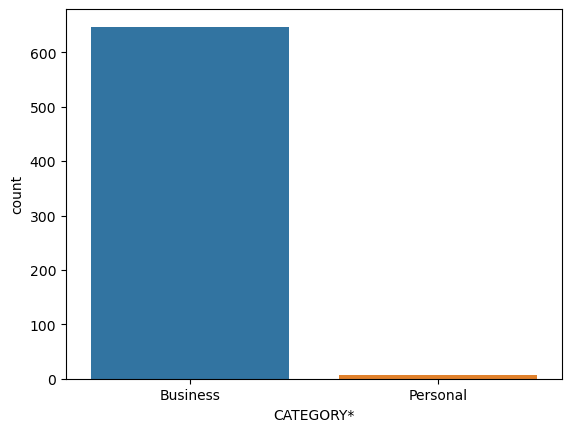

In [15]:
# showing the visuals of category
sns.countplot(x = 'CATEGORY*', data = data);

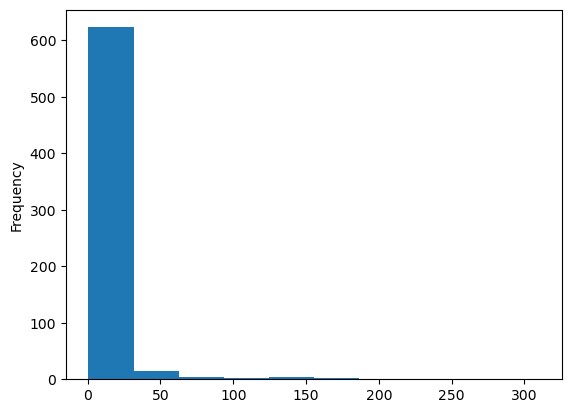

In [16]:
# OBJ 1: How long do people travele with uber

data['MILES*'].plot.hist();


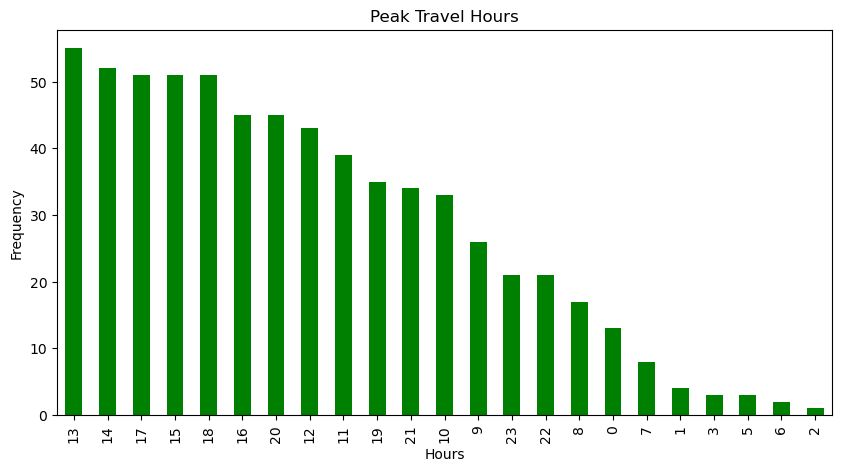

In [17]:
 # OBJ 2 : What hour do most people take uber to their destination?
hours = data['START_DATE*'].dt.hour.value_counts()
hours.plot(kind = 'bar' ,color = 'green', figsize = (10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Peak Travel Hours');

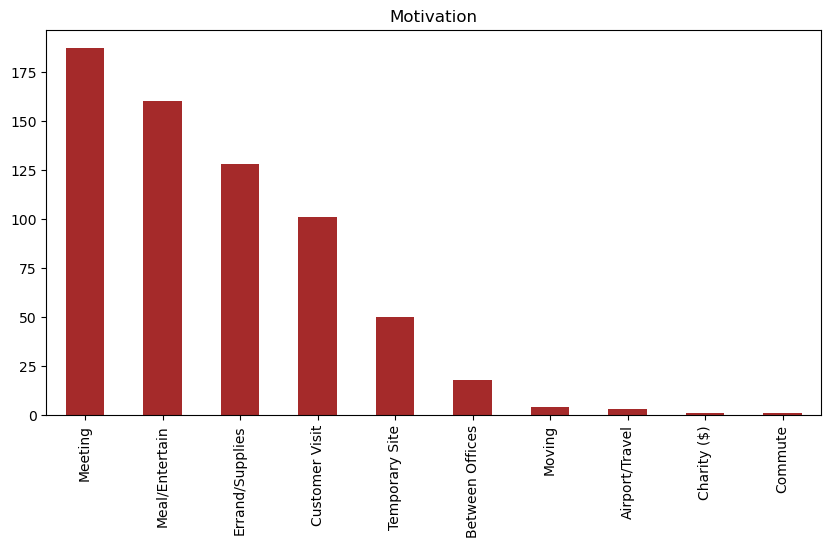

In [18]:
# OBJ 3: Check the purpose of the trips?
data['PURPOSE*'].value_counts().plot(kind = 'bar', color = 'brown', figsize = (10,5))
plt.title('Motivation');

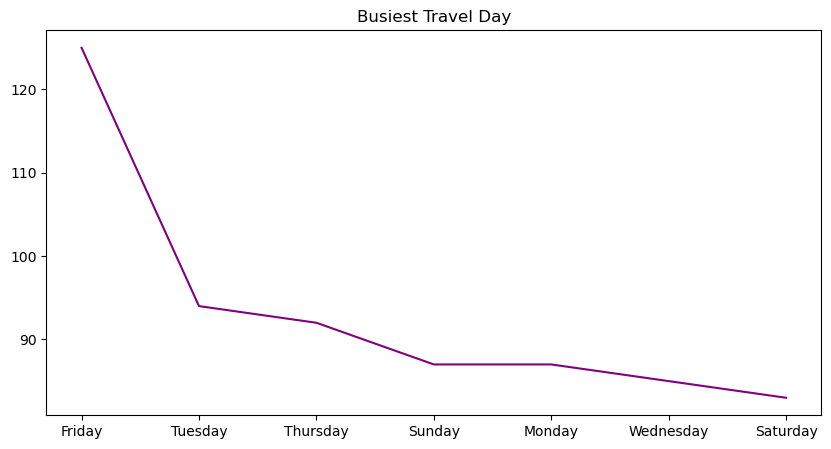

In [19]:
# OBJ 4: Which Day has the highest number of tirps?
data['WEEKDAY'].value_counts().plot(kind = 'line', color = 'purple', figsize = (10,5))
plt.title("Busiest Travel Day");

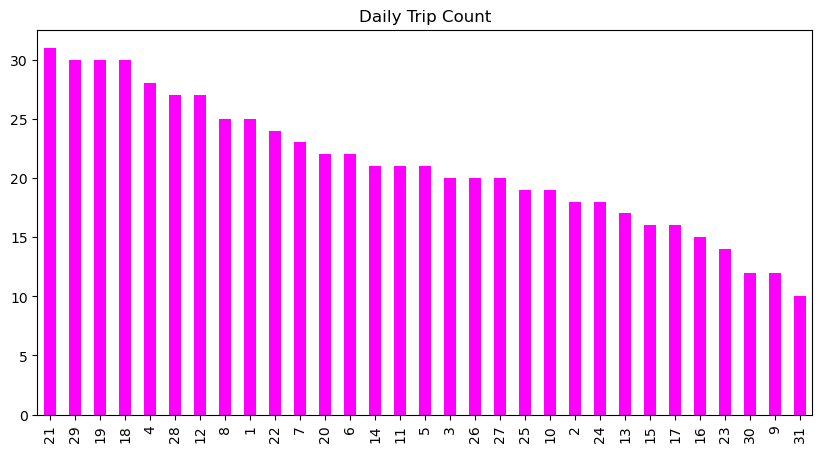

In [20]:
# OBJ 5: What are the number trips per each day?

data['DAY'].value_counts().plot(kind = 'bar', color = 'magenta', figsize = (10,5))
plt.title("Daily Trip Count");

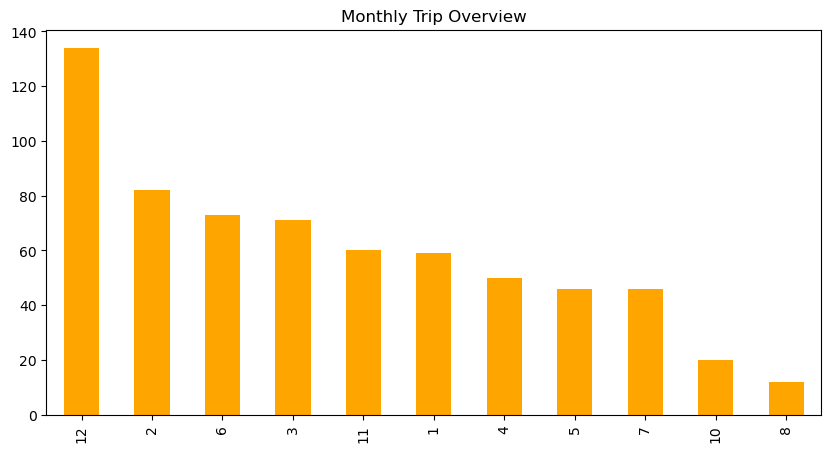

In [21]:
# OBJ 6: What are the Trips in the Month?
data['MONTH'].value_counts().plot(kind = 'bar', color = 'orange', figsize = (10,5))
plt.title("Monthly Trip Overview");

Text(0.5, 1.0, 'Top Bording Location')

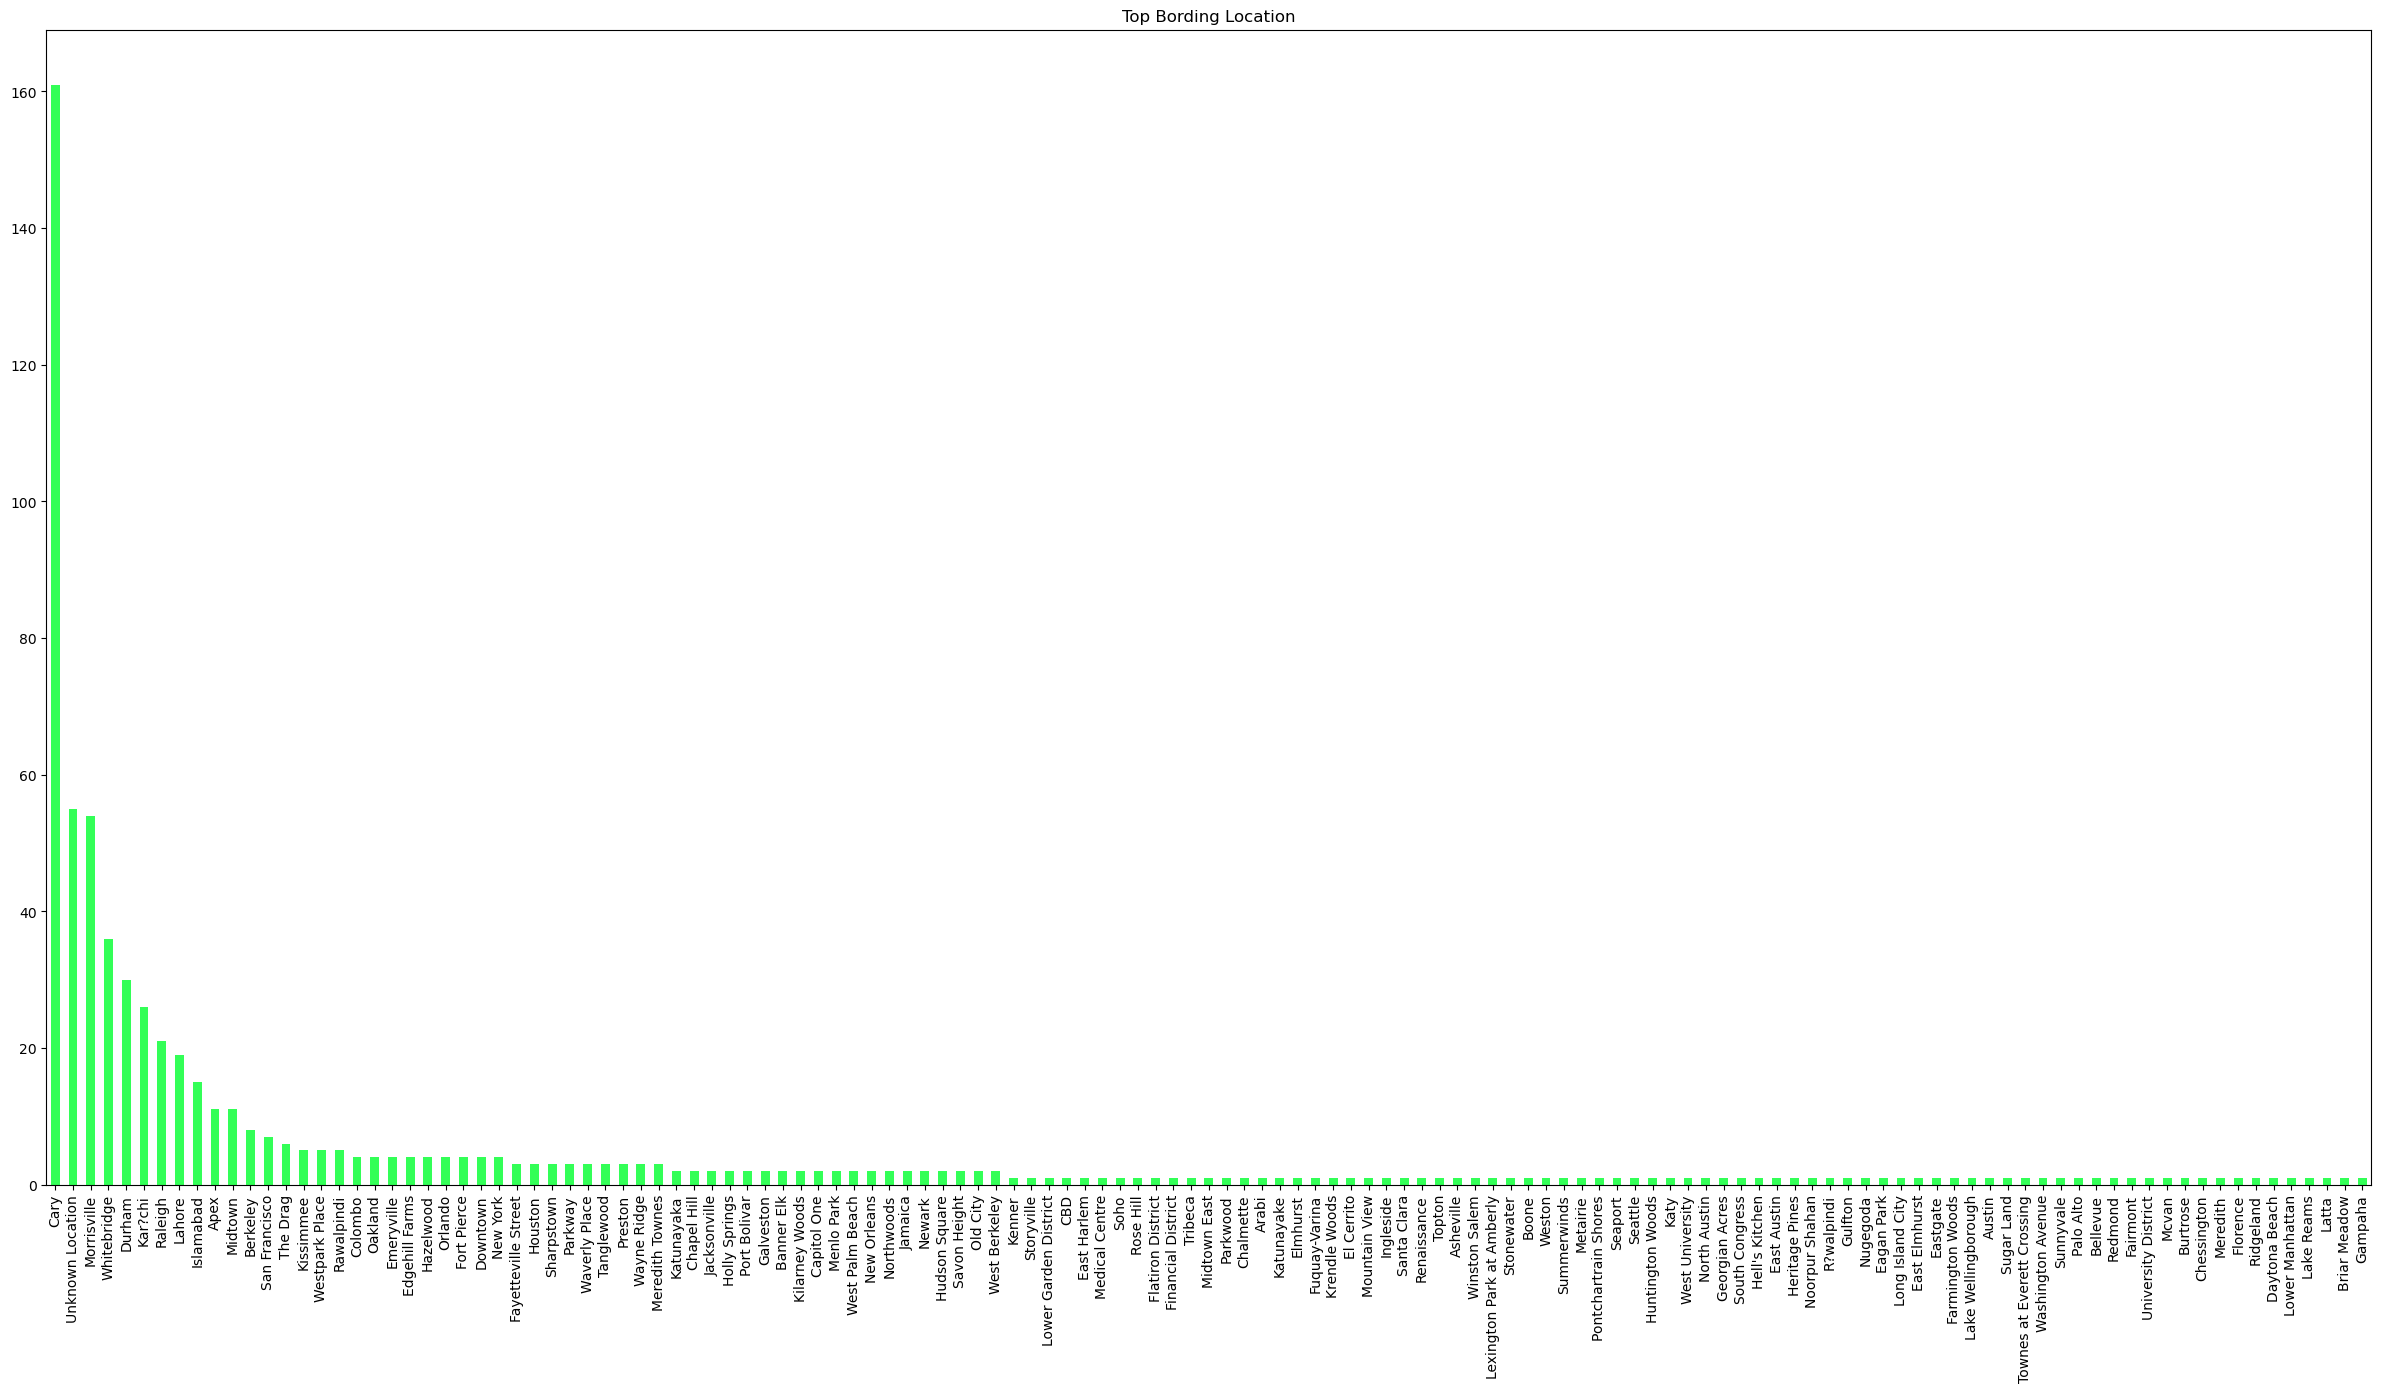

In [22]:
# OBJ 7:The starting point of trips. Where do people start bording their trip from the most?
data['START*'].value_counts().plot(kind = 'bar', color = '#33FF57', figsize = (30,15))
plt.title("Top Bording Location")

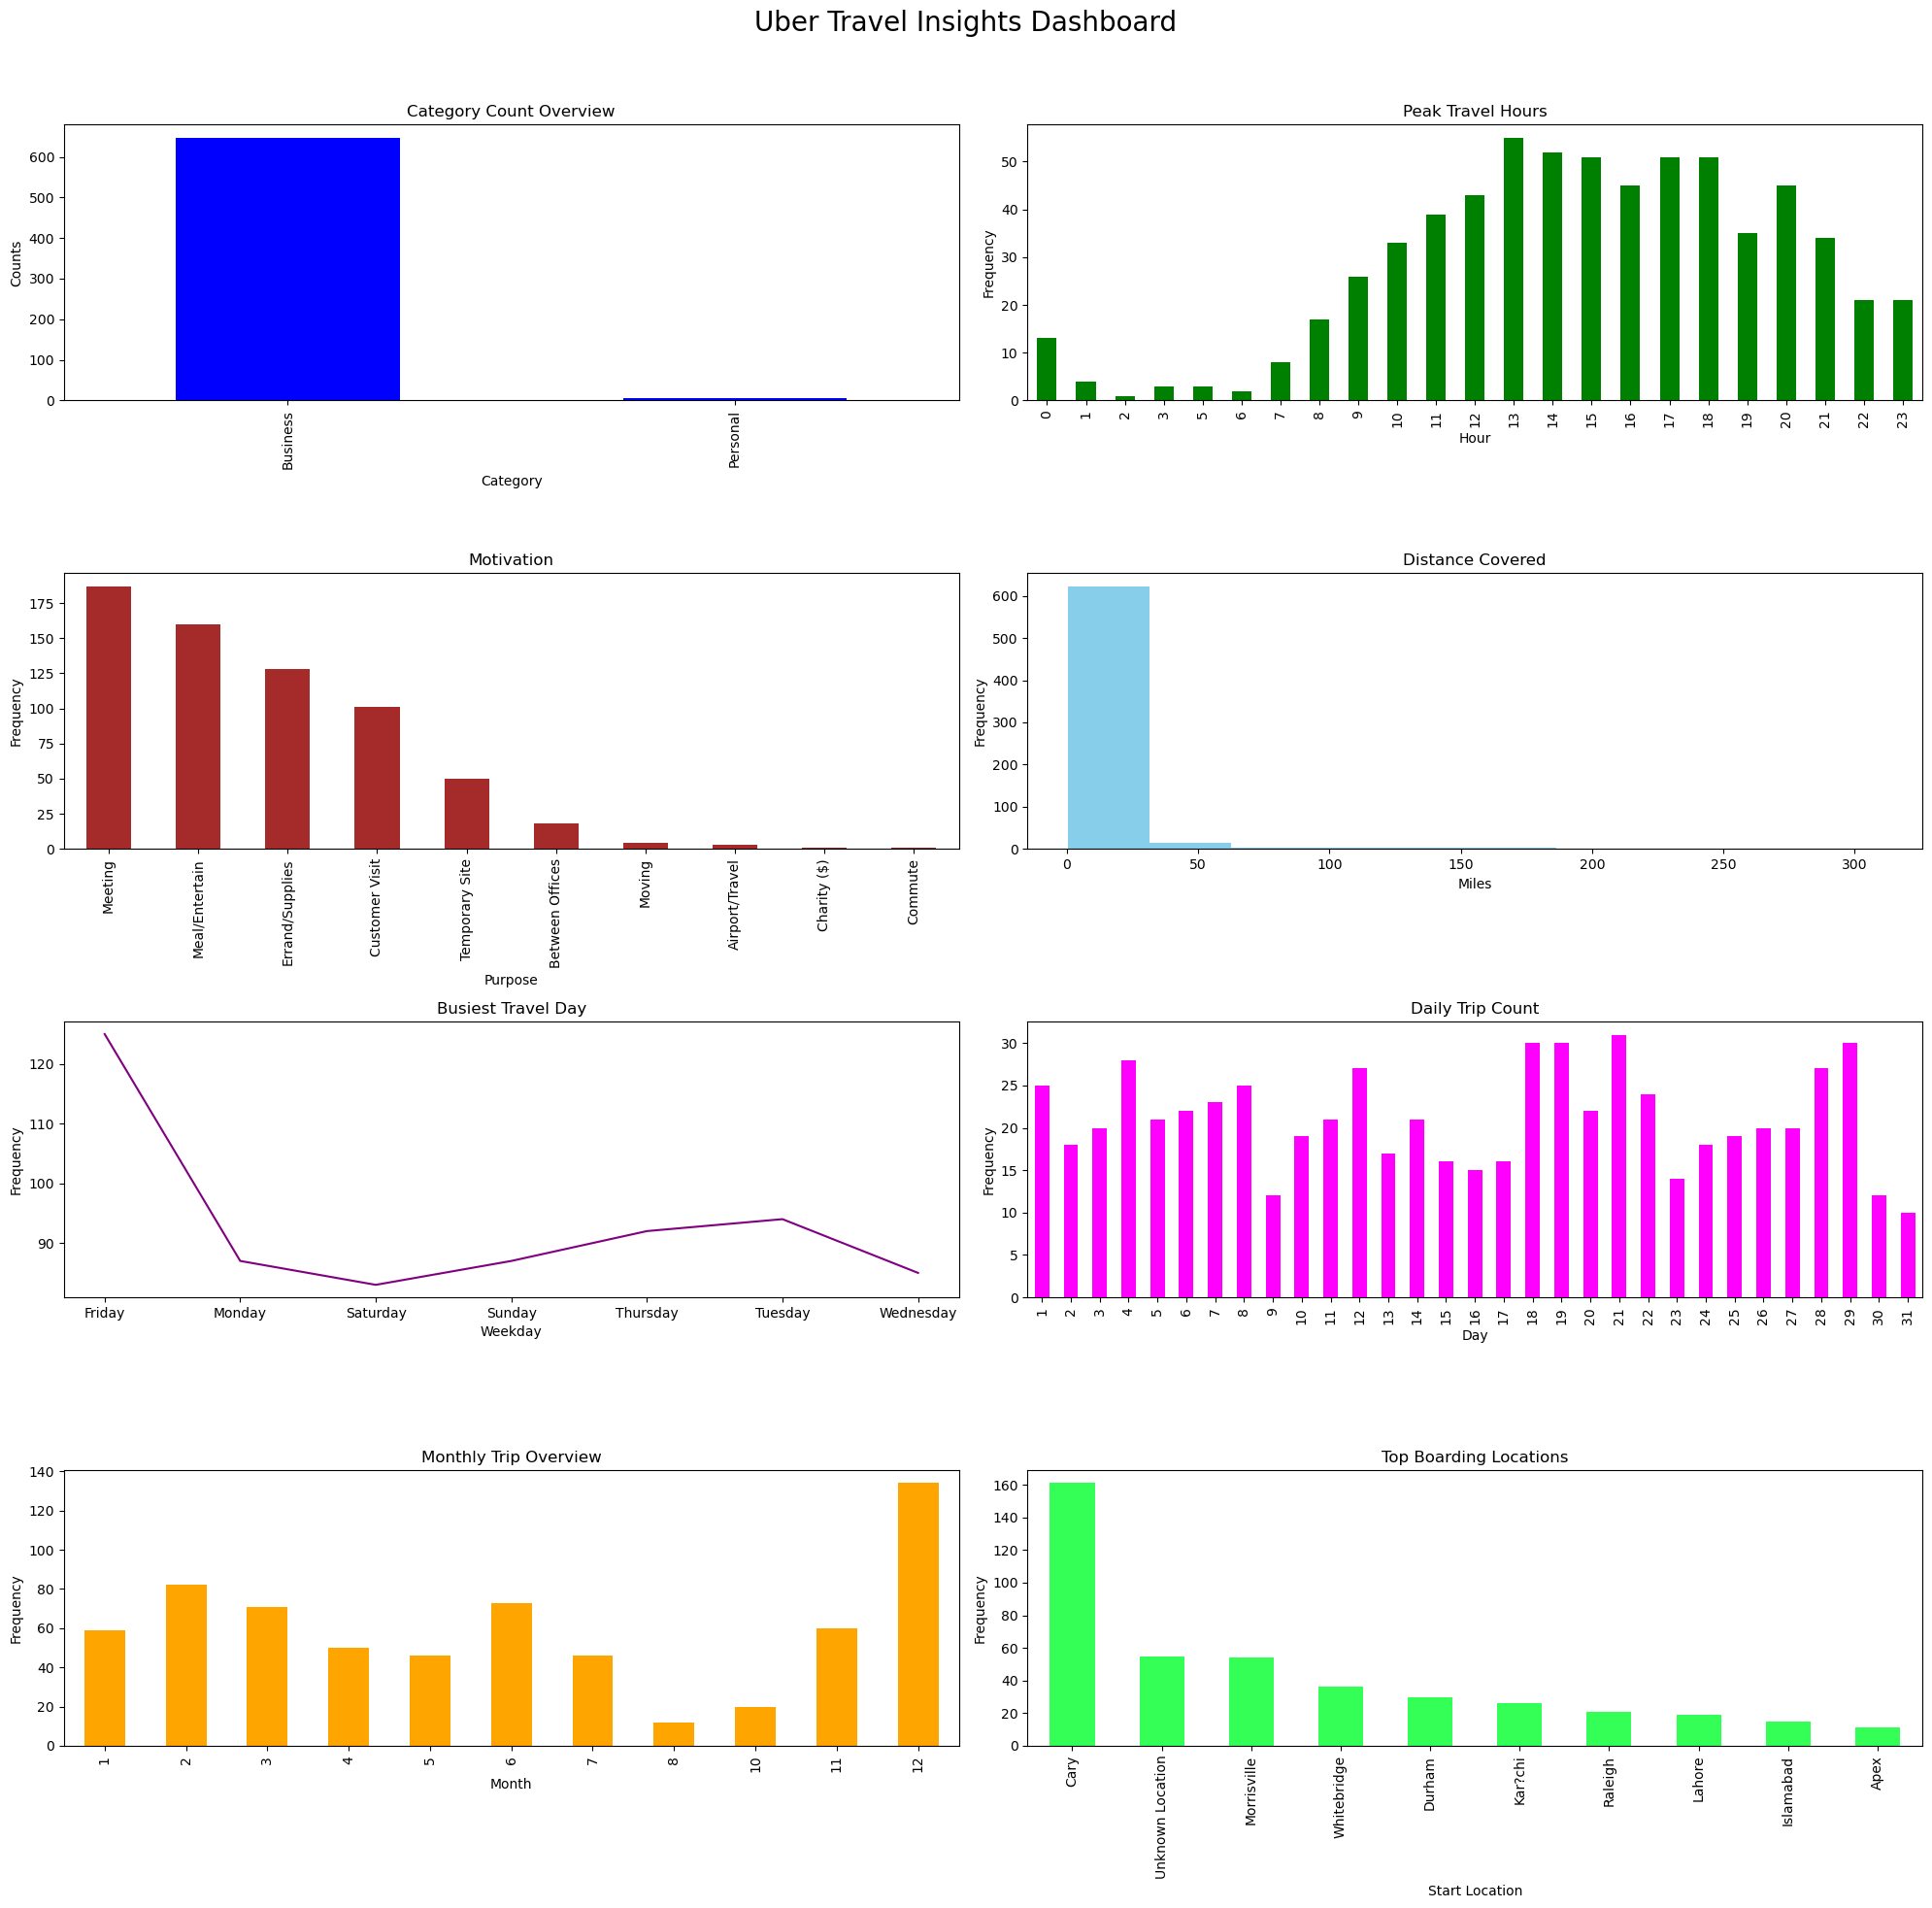

In [23]:
# Creating Python Dashboard

# Create subplots grid (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  
fig.suptitle('Uber Travel Insights Dashboard', fontsize=20)

# Plot 1: Category Count Overview
data['CATEGORY*'].value_counts().plot(kind='bar', color='blue', ax=axes[0, 0])
axes[0, 0].set_xlabel('Category')
axes[0, 0].set_ylabel('Counts')
axes[0, 0].set_title("Category Count Overview")

# Plot 2: Peak Travel Hours
hours = data['START_DATE*'].dt.hour.value_counts().sort_index()  # Sort to ensure proper order
hours.plot(kind='bar', color='green', ax=axes[0, 1])
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Peak Travel Hours')

# Plot 3: Trip Purpose (Motivation)
data['PURPOSE*'].value_counts().plot(kind='bar', color='brown', ax=axes[1, 0])
axes[1, 0].set_xlabel('Purpose')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Motivation')

# Plot 4: Distance Covered (Miles)
data['MILES*'].plot(kind='hist', color='skyblue', ax=axes[1, 1])
axes[1, 1].set_xlabel('Miles')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title("Distance Covered")

# Plot 5: Busiest Travel Day
data['WEEKDAY'].value_counts().sort_index().plot(kind='line', color='purple', ax=axes[2, 0])
axes[2, 0].set_xlabel('Weekday')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title("Busiest Travel Day")

# Plot 6: Daily Trip Count
data['DAY'].value_counts().sort_index().plot(kind='bar', color='magenta', ax=axes[2, 1])
axes[2, 1].set_xlabel('Day')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].set_title("Daily Trip Count")

# Plot 7: Monthly Trip Overview
data['MONTH'].value_counts().sort_index().plot(kind='bar', color='orange', ax=axes[3, 0])
axes[3, 0].set_xlabel('Month')
axes[3, 0].set_ylabel('Frequency')
axes[3, 0].set_title("Monthly Trip Overview")

# Plot 8: Top Boarding Location
data['START*'].value_counts().head(10).plot(kind='bar', color='#33FF57', ax=axes[3, 1])  # Show top 10 locations
axes[3, 1].set_xlabel('Start Location')
axes[3, 1].set_ylabel('Frequency')
axes[3, 1].set_title("Top Boarding Locations")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

fig.savefig('Uber-Dashboard')


# Findings

# Findings from the Uber Travel Insights Dashboard:

# Category Count Overview:

The majority of Uber trips fall into a particular category (e.g., Business or Personal), indicating a dominant use case.
This shows that Uber serves a specific customer base more frequently,
such as professionals commuting to work or individuals using Uber for personal errands.

# Peak Travel Hours:

The dashboard shows clear peaks in Uber usage during specific hours, likely corresponding to morning and evening
commute times (e.g., 7-9 AM and 5-7 PM). This pattern suggests that most Uber rides are taken during rush hours
when people are traveling to and from work or school.

# Purpose of Trips (Motivation):

Trip purposes, such as business, social, or personal travel, reveal why people use Uber. 
A significant portion of the trips are motivated by business needs, indicating that Uber is a popular choice for corporate 
travel.

# Distance Covered (Miles):

The histogram of miles traveled indicates that the majority of trips are relatively short,
likely within city limits. However, there are also longer trips, suggesting that Uber is used for occasional airport
pickups or intercity travel.

# Busiest Travel Day:

The analysis of days of the week reveals a peak on a specific day
(e.g., Friday or Saturday), suggesting that Uber is widely used for weekend social activities.
If weekday peaks are observed, it indicates that commuting plays a significant role in Uber's usage.

# Daily Trip Count:

The day-to-day trip count highlights fluctuating demand within the month, 
potentially peaking around specific dates such as paydays, holidays, or weekends, 
when people tend to travel more frequently.

# Monthly Trip Overview:

The monthly distribution of trips suggests higher activity in certain months,
possibly influenced by factors such as weather, holidays, or seasonal events. 
For example, Uber usage may increase in the summer months or around major holidays.

# Top Boarding Locations:

The analysis of boarding locations reveals the areas where most Uber trips begin. 
These are likely central business districts, airports, or popular tourist destinations,
reflecting high-demand areas where Uber services are frequently required.


# Conclusions:
The Uber Travel Insights Dashboard provides a clear picture of how Uber 
is used by its customers. Most trips occur during peak commuting hours and
are relatively short in distance, suggesting that Uber is primarily used for
work commutes and personal errands. The dominant trip categories and purposes 
indicate that business and personal travel drive most of the demand.
The busiest travel days, typically Fridays or Saturdays, reveal that Uber also plays a 
significant role in social and leisure activities.

Boarding locations centered around major urban areas,
airports, and business districts further highlight Uber's role in urban mobility,
providing flexible transportation solutions for both daily commuters and occasional travelers.

# Recommendations:

# Optimize Driver Availability:

Since most Uber trips occur during peak hours,
Uber should allocate more drivers during these times to reduce wait
times and improve customer satisfaction. Surge pricing could also be 
adjusted to better reflect these peak demands.

# Target Business Travelers:

With a significant number of trips categorized as business-related,
Uber could develop specific marketing campaigns and partnerships with companies to 
promote its business travel services.

# Expand Airport Services:

The presence of long-distance trips and high 
demand at specific boarding locations like airports suggests 
that Uber could further optimize its airport services, possibly offering special promotions for travelers.

# Enhance Weekend Services:

Since weekends show a significant spike in usage, 
particularly for social purposes, Uber could promote special weekend discounts or 
partnerships with entertainment venues to encourage even more ridership.

# Seasonal Promotions:

The monthly trip overview indicates increased usage in certain months.
Uber could capitalize on this by offering seasonal promotions, 
particularly during holidays or vacation periods, to boost ridership.